## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

In [3]:
# 讀csv資料
app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

In [4]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [5]:
app_train.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.095213,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,...,0.003941,0.030090,0.007466,0.005785,0.005284,0.214757,0.210773,0.017437,0.518446,0.007570
std,102790.175348,0.272419,0.293509,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,...,0.062656,0.170835,0.086085,0.075840,0.072501,0.410654,0.407858,0.130892,0.499660,0.086679
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,456255.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
app_train['AGE'] = app_train['DAYS_BIRTH']/365
app_train['YEAR_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])/365
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM,AGE,YEAR_EMPLOYED
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,1,0,1,0,False,25.920548,1.745205
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,1,0,False,45.931507,3.254795
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,False,52.180822,0.616438
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,False,52.068493,8.326027
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,False,54.608219,8.323288


### 等寬劃分

In [7]:
app_train["AGE_EQUAL_WIDTH"] = pd.cut(app_train["AGE"], 10)
app_train.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM,AGE,YEAR_EMPLOYED,AGE_EQUAL_WIDTH
0,100002,1,0,0,1,0,202500.000,406597.5,24700.5,351000.0,...,0,0,1,0,1,0,False,25.920548,1.745205,"(25.378, 30.238]"
1,100003,0,0,0,0,0,270000.000,1293502.5,35698.5,1129500.0,...,0,0,0,0,1,0,False,45.931507,3.254795,"(44.819, 49.679]"
2,100004,0,1,1,1,0,67500.000,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,False,52.180822,0.616438,"(49.679, 54.54]"
3,100006,0,0,0,1,0,135000.000,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,False,52.068493,8.326027,"(49.679, 54.54]"
4,100007,0,0,0,1,0,121500.000,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,False,54.608219,8.323288,"(54.54, 59.4]"
5,100008,0,0,0,1,0,99000.000,490495.5,27517.5,454500.0,...,0,0,0,0,0,0,False,46.413699,4.350685,"(44.819, 49.679]"
6,100009,0,0,1,1,1,171000.000,1560726.0,41301.0,1395000.0,...,0,0,0,0,0,0,False,37.747945,8.575342,"(35.099, 39.959]"
7,100010,0,0,1,1,0,360000.000,1530000.0,42075.0,1530000.0,...,0,0,0,0,0,0,False,51.643836,1.230137,"(49.679, 54.54]"
8,100011,0,0,0,1,0,112500.000,1019610.0,33826.5,913500.0,...,0,0,0,0,0,0,True,55.065753,NaN,"(54.54, 59.4]"
9,100012,0,1,0,1,0,135000.000,405000.0,20250.0,405000.0,...,0,0,0,0,0,0,False,39.641096,5.531507,"(35.099, 39.959]"


In [8]:
app_train['AGE_EQUAL_WIDTH'].value_counts() # 每個 bin 的值的範圍大小都是一樣的

(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: AGE_EQUAL_WIDTH, dtype: int64

### 等頻劃分

In [9]:
app_train["AGE_FREQ_WIDTH"] = pd.qcut(app_train["AGE"], 6)
app_train.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM,AGE,YEAR_EMPLOYED,AGE_EQUAL_WIDTH,AGE_FREQ_WIDTH
0,100002,1,0,0,1,0,202500.000,406597.5,24700.5,351000.0,...,0,1,0,1,0,False,25.920548,1.745205,"(25.378, 30.238]","(20.517, 30.805]"
1,100003,0,0,0,0,0,270000.000,1293502.5,35698.5,1129500.0,...,0,0,0,1,0,False,45.931507,3.254795,"(44.819, 49.679]","(43.151, 50.173]"
2,100004,0,1,1,1,0,67500.000,135000.0,6750.0,135000.0,...,0,0,0,0,0,False,52.180822,0.616438,"(49.679, 54.54]","(50.173, 57.589]"
3,100006,0,0,0,1,0,135000.000,312682.5,29686.5,297000.0,...,0,0,0,0,0,False,52.068493,8.326027,"(49.679, 54.54]","(50.173, 57.589]"
4,100007,0,0,0,1,0,121500.000,513000.0,21865.5,513000.0,...,0,0,0,0,0,False,54.608219,8.323288,"(54.54, 59.4]","(50.173, 57.589]"
5,100008,0,0,0,1,0,99000.000,490495.5,27517.5,454500.0,...,0,0,0,0,0,False,46.413699,4.350685,"(44.819, 49.679]","(43.151, 50.173]"
6,100009,0,0,1,1,1,171000.000,1560726.0,41301.0,1395000.0,...,0,0,0,0,0,False,37.747945,8.575342,"(35.099, 39.959]","(37.195, 43.151]"
7,100010,0,0,1,1,0,360000.000,1530000.0,42075.0,1530000.0,...,0,0,0,0,0,False,51.643836,1.230137,"(49.679, 54.54]","(50.173, 57.589]"
8,100011,0,0,0,1,0,112500.000,1019610.0,33826.5,913500.0,...,0,0,0,0,0,True,55.065753,NaN,"(54.54, 59.4]","(50.173, 57.589]"
9,100012,0,1,0,1,0,135000.000,405000.0,20250.0,405000.0,...,0,0,0,0,0,False,39.641096,5.531507,"(35.099, 39.959]","(37.195, 43.151]"


In [11]:
app_train["AGE_FREQ_WIDTH"].value_counts() # 每個 bin 的資料筆數是一樣的

(43.151, 50.173]    51262
(30.805, 37.195]    51260
(20.517, 30.805]    51254
(50.173, 57.589]    51251
(37.195, 43.151]    51247
(57.589, 69.121]    51237
Name: AGE_FREQ_WIDTH, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

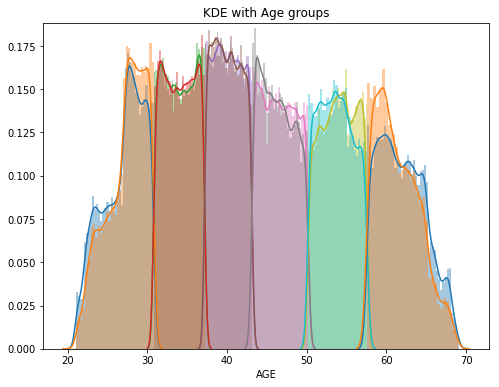

In [20]:
import seaborn as sns # 另一個繪圖-樣式套件
year_group_sorted = app_train['AGE_FREQ_WIDTH'].value_counts().keys().sort_values()

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(app_train.loc[(app_train['AGE_FREQ_WIDTH'] == year_group_sorted[i]) & \
                              (app_train['FLAG_OWN_CAR'] == 0), 'AGE'], label = str(year_group_sorted[i]))
    
    sns.distplot(app_train.loc[(app_train['AGE_FREQ_WIDTH'] == year_group_sorted[i]) & \
                              (app_train['FLAG_OWN_CAR'] == 1), 'AGE'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

In [22]:
# 計算每個年齡區間的欄位的平均值
age_groups  = app_train.groupby('AGE_FREQ_WIDTH').mean()
age_groups

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM,AGE,YEAR_EMPLOYED
AGE_FREQ_WIDTH,,,,,,,,,,,,,,,,,,,,,
"(20.517, 30.805]",277684.893472,0.114137,0.141647,0.370547,0.610391,0.476548,160834.349946,489811.561020,24997.890548,441404.034923,...,0.005248,0.005131,0.207281,0.201779,0.018574,0.500488,0.007921,0.003219,27.082198,3.316398
"(30.805, 37.195]",278301.841826,0.098849,0.098439,0.408525,0.638022,0.848673,179738.118944,591549.478911,27736.927631,531891.864303,...,0.007023,0.005092,0.214807,0.206282,0.017831,0.514358,0.007745,0.004467,34.016430,5.241736
"(37.195, 43.151]",278109.590903,0.081780,0.096337,0.399692,0.676605,0.730794,180629.573869,637703.885584,28477.447253,573275.670694,...,0.006108,0.005522,0.213866,0.213866,0.018889,0.524460,0.008176,0.011864,40.121504,6.700821
"(43.151, 50.173]",278404.929051,0.075768,0.090379,0.366139,0.731965,0.340915,179768.035202,665387.775184,28947.538442,595798.871991,...,0.005930,0.005423,0.210448,0.215930,0.017576,0.516738,0.008018,0.029905,46.526420,7.809541
"(50.173, 57.589]",278492.842227,0.063043,0.080623,0.294511,0.738112,0.086789,167998.116224,653227.699372,27867.822660,587266.151580,...,0.005541,0.005405,0.213225,0.210376,0.016351,0.516770,0.007024,0.258414,53.915586,9.303452
"(57.589, 69.121]",278088.942971,0.050784,0.063841,0.201183,0.766965,0.018444,143809.609550,556460.452046,24622.954945,500646.696620,...,0.004860,0.005133,0.228917,0.216406,0.015399,0.537873,0.006538,0.772781,61.966500,11.059025


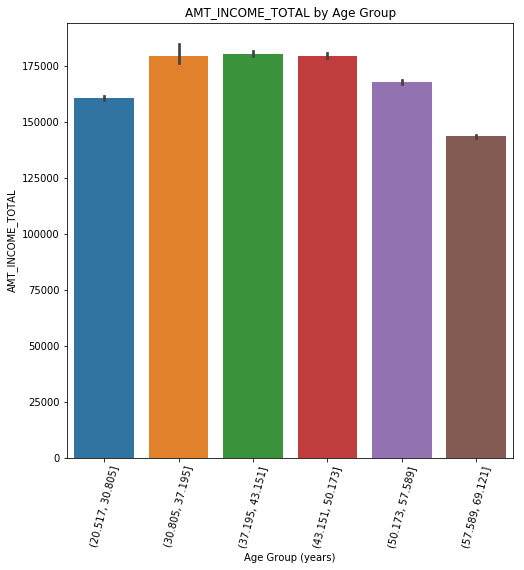

In [23]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
px = app_train['AGE_FREQ_WIDTH']
py = app_train['AMT_INCOME_TOTAL']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); 
plt.xlabel('Age Group (years)'); 
plt.ylabel('AMT_INCOME_TOTAL')
plt.title('AMT_INCOME_TOTAL by Age Group');